In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import randint
from joblib import load, dump
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS

from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

## Dataset Prep

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/dataset_7_features.csv')
dataset.sample(10)

,Domain,Label,DGA Family,Length,Relative Entropy,Numerical Percentage,Max Consecutive Consonants,Max Consecutive Vowels,Vowel Count,Vowel Rate
319309,kgeqqmjfpynhtmbfb,0,ranbyus_v2,17,1.515706,0.000000,14,1,1,0.058824
75632,yycamxhrtrkaf,0,cryptolocker,13,1.600234,0.000000,7,1,2,0.153846
461360,5rscw2nxsg,0,shiotob,10,2.171946,0.200000,4,0,0,0.000000
497050,xwlqqoopgjht,0,tinba,12,1.933493,0.000000,5,2,2,0.166667
602465,visaguide,1,None,9,1.553480,0.000000,1,2,5,0.555556
765303,theparkat14,1,None,11,1.826418,0.181818,2,1,3,0.272727
308688,wjwhqvkrhtwaxg,0,ranbyus_v1,14,1.922735,0.000000,11,1,1,0.071429
582176,peregrinefund,1,None,13,1.406012,0.000000,2,1,5,0.384615
569428,xxxxxx,1,None,6,6.016935,0.000000,6,0,0,0.000000
916048,elgrecocosmetics,1,None,16,1.165345,0.000000,3,1,6,0.375000


In [ ]:
dataset = dataset[dataset['Label'] == 0]
dataset.sample(10)

,Domain,Label,DGA Family,Length,Relative Entropy,Numerical Percentage,Max Consecutive Consonants,Max Consecutive Vowels,Vowel Count,Vowel Rate
298618,rylyixlrxitrq,0,ramnit,13,2.180249,0.000000,4,1,2,0.153846
363464,irifetg,0,tempedreve,7,1.890865,0.000000,2,1,3,0.428571
449383,thatconsanguinityinconnections,0,rovnix,30,1.077892,0.000000,2,2,11,0.366667
362244,shargvedixs,0,tempedreve,11,1.381197,0.000000,3,1,3,0.272727
486673,shantellesherisse,0,suppobox_3,17,1.328428,0.000000,2,1,6,0.352941
425785,devicestation,0,pizd,13,1.054552,0.000000,2,2,6,0.461538
214709,p62j46cwerprarb18nqexnugxp52lqoymtcu,0,murofet_v3,36,0.947894,0.222222,4,1,6,0.166667
299370,psukkvhkpkj,0,ramnit,11,2.742144,0.000000,8,1,1,0.090909
423960,closeexpect,0,pizd,11,1.594785,0.000000,2,2,4,0.363636
80640,y13631814b176314434f94cd1b3f9d62b8,0,dyre,34,3.261735,0.735294,2,0,0,0.000000


In [ ]:
le = LabelEncoder()
dataset['DGA Family'] = le.fit_transform(dataset['DGA Family'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset = dataset[dataset['DGA Family'] < 10]
dataset.sample(10)

,Domain,Label,DGA Family,Length,Relative Entropy,Numerical Percentage,Max Consecutive Consonants,Max Consecutive Vowels,Vowel Count,Vowel Rate
56109,oaigscmiwhpo,0,2,12,1.338080,0.000000,4,3,5,0.416667
92681,ingqjubaotygxpzje,0,9,17,1.201086,0.000000,7,2,5,0.294118
16347,j3vql1dq8s6w,0,5,12,2.585950,0.333333,3,0,0,0.000000
51708,couotimqyxl0,0,2,12,1.636561,0.083333,5,3,4,0.333333
76244,yuqwinmaewah,0,6,12,1.499634,0.000000,2,2,5,0.416667
20901,thonttvfxqtoac,0,7,14,1.641450,0.000000,8,2,3,0.214286
2578,ab17ad0542d06,0,3,13,3.002210,0.615385,1,1,2,0.153846
98339,asodqhpeyxflbopdb,0,9,17,1.269337,0.000000,5,1,4,0.235294
88240,rc1933ec2a10b412a33ef24d2415a2994c,0,8,34,2.671452,0.647059,2,1,5,0.147059
74734,bkmplaeonjejnd,0,6,14,1.349286,0.000000,5,3,4,0.285714


In [ ]:
dataset.sample(10)

,Domain,Label,DGA Family,Length,Relative Entropy,Numerical Percentage,Max Consecutive Consonants,Max Consecutive Vowels,Vowel Count,Vowel Rate
23391,crkyldoavcxbyl,0,7,14,1.553362,0.000000,6,2,2,0.142857
41933,ogglerionirkutskagl,0,1,19,1.059805,0.000000,3,2,7,0.368421
53293,ckahgivwvksjstr,0,2,15,1.412914,0.000000,9,1,2,0.133333
21985,pfxevjoutfvb,0,7,12,1.862049,0.000000,4,2,3,0.250000
40727,oygterionirkutskagl,0,1,19,0.912935,0.000000,3,2,7,0.368421
40970,ocwherionirkutskagl,0,1,19,0.719105,0.000000,3,2,7,0.368421
2742,ab49c7fb82670,0,3,13,3.057592,0.615385,2,1,1,0.076923
94803,gvfztrsejjmlugage,0,9,17,1.331859,0.000000,7,1,4,0.235294
55774,phhsakdbebrmslkgm,0,2,17,1.289908,0.000000,8,1,2,0.117647
11285,pwrcpexq4wvc8kveh7,0,5,18,1.866055,0.166667,5,1,2,0.111111


In [ ]:
X = np.array(dataset[['Length', 'Relative Entropy', 'Numerical Percentage', 'Max Consecutive Consonants', 'Max Consecutive Vowels', 'Vowel Count', 'Vowel Rate']])
y = np.array(dataset['DGA Family'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Training set samples - {X_train.shape[0]}')
print(f'Testing set samples - {X_test.shape[0]}')

Training set samples - 80000
Testing set samples - 20000


In [ ]:
def metrics_report(y_test, predictions):
    print("Accuracy :", accuracy_score(y_test, predictions))

    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')

    print("Macro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

## K-Means

In [ ]:
K_Means_clt = KMeans(n_clusters=50, n_init=1, random_state=42)

In [ ]:
K_Means_clt.fit(X_train)

KMeans(n_clusters=50, n_init=1, random_state=42)

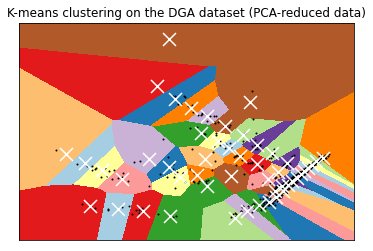

In [ ]:
reduced_data = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
kmeans = KMeans(init="k-means++", n_clusters=50, n_init=4)
kmeans.fit(reduced_data)

h = 0.01

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:1000, 0], reduced_data[:1000, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the DGA dataset (PCA-reduced data)"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Agglomerative Clustering

## OPTICS

In [ ]:
clustering = AgglomerativeClustering(n_clusters=10, compute_full_tree=False).fit(X_train)